## Sortownie Shella
### Wykorzystane zostały kroki wg następujących ciagów wg Wikipedii:
#### Ciągi malejące - ostatni wyraz ciągu wynosi 1
$
    \\ Shell: \ a_k = [\frac{N}{2^{k}}] 
    \\ Lazarus: \ a_k = {2}[\frac{N}{2^{k+1}}]+1
$
#### Ciągi rosnące - ostatni wyraz ciągu jest mniejszy niż N
$
    \\ Hibbard: \ a_k = {2^{k}}-1
    \\ Stasiewicz: \ a_k = 2^{k}+1, na \ początku \ 1
    \\ Sedgewick \ a_k = 4^{k}+{3}\cdot{2^{k-1}}+1, na \ początku \ 1
    \\ Knuth: \ a_k = \frac{3^k-1}{2} \ - \ ostatni \ wyraz \ ciągu \ mniejszy \ niż \ \  [\frac{N}{3}]+1
$
<br>
gdzie N - długość sortowanej tablicy


<br>

### Funkcje
Sortowanie napisane zostało iteracyjnie, w oparciu o dwie funkcje:
- create_seq - generuje sekwencję wg której działać będzie sortowanie
- shell_sort - sortuje w oparciu o odstępy z ww. sekwencji
 

In [23]:
def create_seq(N, method):
    tab = []
    
    if method == 'Shell':
        ele = N//2
        while ele >= 1:
            tab.append(ele)
            ele = ele // 2
            
    if method == 'Lazarus':
        ele = 2 * N//4 + 1
        i = 3
        while ele > 1: 
            tab.append(ele)
            ele = 2 * int(N/2**i) +1
            i+=1
        tab.append(1)
            
    elif method == 'Hibbard':
        ele = 1
        i = 2
        while ele < N:
            tab.append(ele)
            ele = 2**i - 1
            i+=1
        tab.reverse()
        
    elif method == 'Stasiewicz':
        ele = 1
        i = 1
        while ele < N:
            tab.append(ele)
            ele = 2**i + 1
            i+=1
        tab.reverse()
    elif method == 'Knuth':
        ele = 1
        i = 2
        while ele < int(N/3)+1:
            tab.append(ele)
            ele = ((3**i)-1)//2
            i+=1
        tab.reverse()
    elif method == 'Sedgewick':
        ele = 1
        i = 1
        while ele < N:
            tab.append(ele)
            ele = 4**i + 3 * 2**(i-1) + 1
            i+=1
        tab.reverse()
    elif method == 'Comb':
        ele = int(N/1.3)
        while ele >= 1:
            tab.append(ele)
            ele = int(ele/1.3)
    return tab

In [24]:
def shell_sort(tab, method = 'Shell'):
    N = len(tab)
    seq = create_seq(N, method)
    for step in seq:
        for i in range(step, N):
            tmp = tab[i]
            j = i
            while ((tab[j-step] > tmp) and (j >= step)):
                tab[j] = tab[j - step]
                j -= step
            tab[j] = tmp

## Sortowanie grzebieniowe
### Ostatni wyraz ciągu wynosi 1
$
    \\ a_k =  \ [\frac{N}{1.3^k}] 
$


In [59]:
def comb_sort(tab,*args):
    N = len(tab)
    seq = create_seq(N, 'Comb')
    for step in seq:
        for i in range(N-step):
            if tab[i] > tab[i+step]:
                tab[i], tab[i+step] = tab[i+step], tab[i]

## Porównanie wyników

In [25]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
random.seed(123)

In [31]:
def checker(sorted_func, *args):
    timing = []
    N = 20
    for i in range(0,N):
        lst = [random.randint(1,1000) for i in range((N**3)*i)]
        if args[1] == 'ascending':
            lst.sort()
        if args[1] == 'descending':
            lst.sort(reverse = True)
        start = time.time()
        sorted_func(lst, args[0])
        end = time.time()
        timing.append(end - start)
    return timing, [i*(N**3) for i in range(N)]

In [46]:
methods = ['Shell', 'Lazarus', 'Hibbard','Stasiewicz','Knuth', 'Sedgewick']

In [49]:
df_unsorted = pd.DataFrame(checker(shell_sort, 'Shell','')[1], columns = ['table_len'])
for method in methods:
    df_unsorted[method] = checker(shell_sort, method, '')[0]
df_unsorted['comb_sort'] = checker(comb_sort,'','')[0]

df_asc = pd.DataFrame(checker(shell_sort, 'Shell','')[1], columns = ['table_len'])
for method in methods:
    df_asc[method] = checker(shell_sort, method, 'ascending')[0]
df_asc['comb_sort'] = checker(comb_sort,'','ascending')[0]

df_desc = pd.DataFrame(checker(shell_sort, 'Shell','')[1], columns = ['table_len'])
for method in methods:
    df_desc[method] = checker(shell_sort, method, 'descending')[0]
df_desc['comb_sort'] = checker(comb_sort,'','descending')[0]
    

In [50]:
lst = [random.randint(1,1000) for i in range(1000)]
tab = pd.DataFrame(lst)
lst.sort()
tab_asc = pd.DataFrame(lst)
lst.sort(reverse = True)
tab_desc = pd.DataFrame(lst)

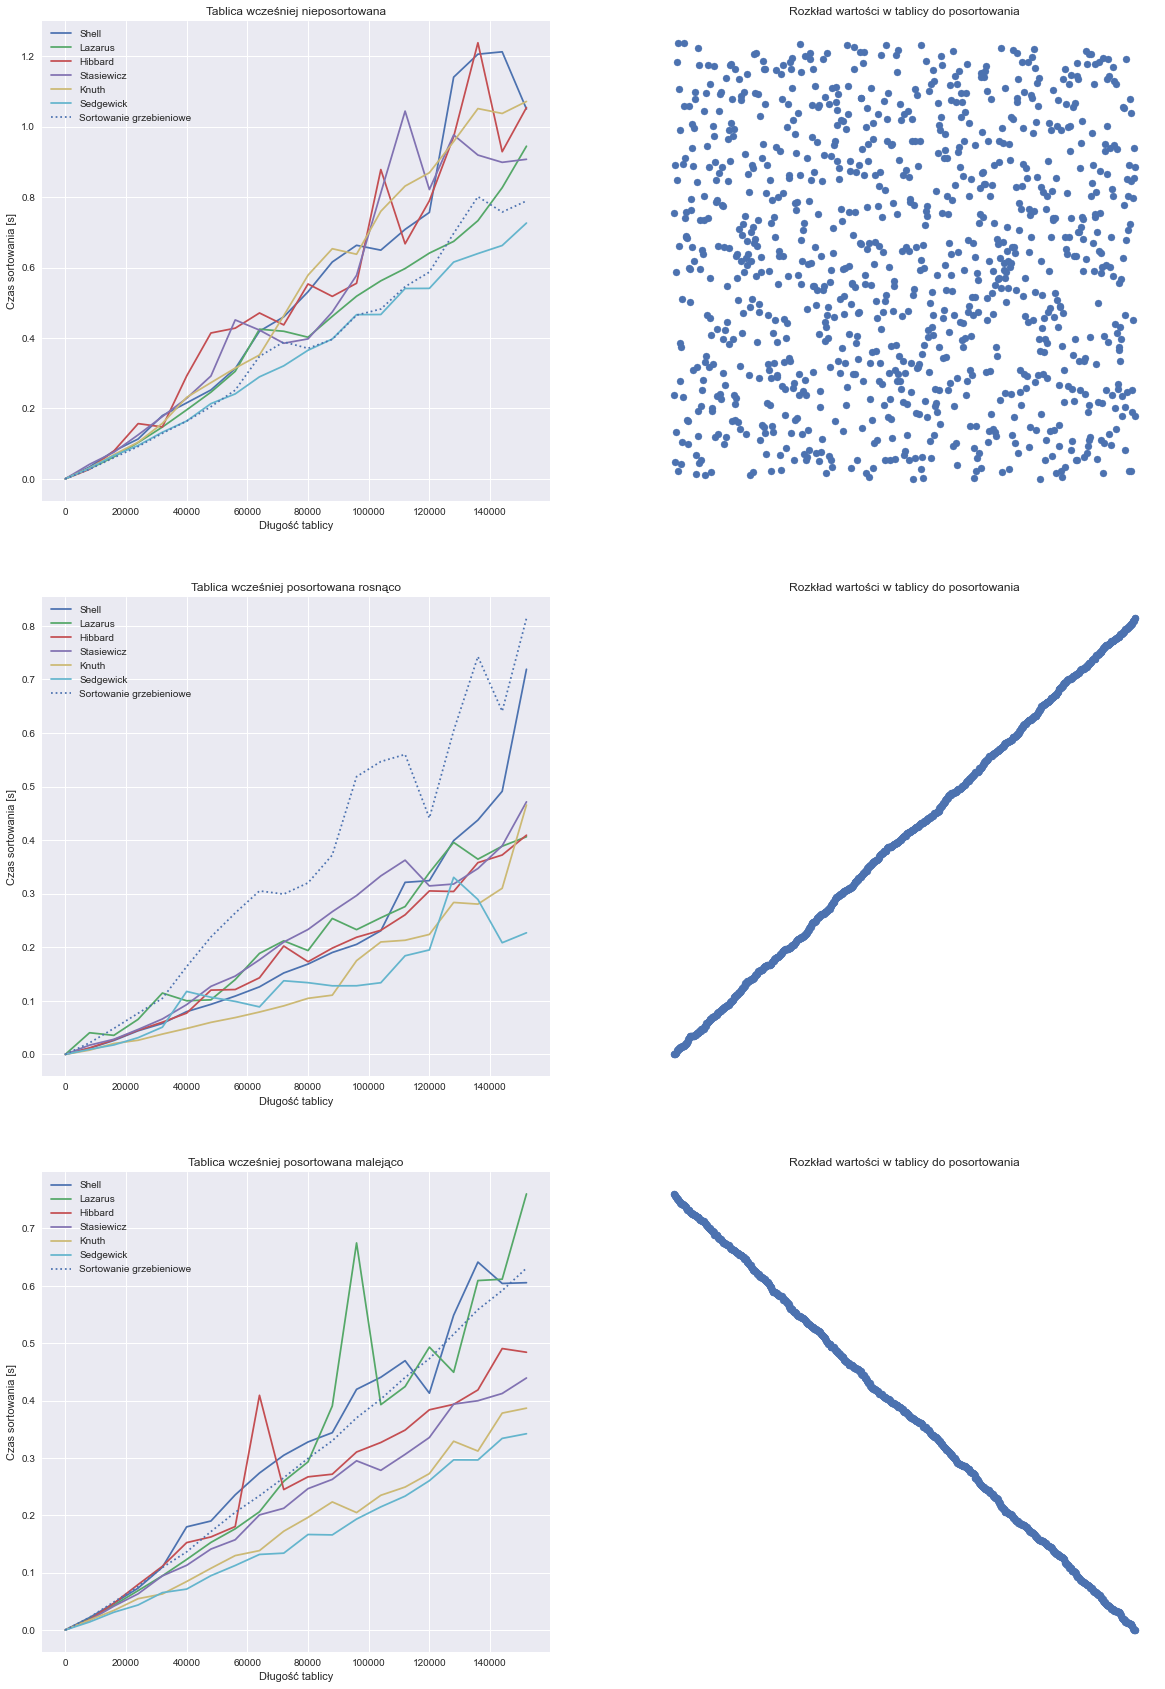

In [58]:
fig, axs = plt.subplots(3,2)
fig.set_size_inches(20,30)
for method in methods:
    axs[0][0].plot(df_unsorted.table_len, df_unsorted[method], label = f'{method}')
axs[0][0].plot(df_unsorted.table_len, df_unsorted.comb_sort, linestyle = 'dotted', label = 'Sortowanie grzebieniowe') 
axs[0][0].set_title('Tablica wcześniej nieposortowana')
axs[0][0].legend()
axs[0][1].scatter(tab.index, tab)
axs[0][1].set_title('Rozkład wartości w tablicy do posortowania')
axs[0][1].axis('off')
    
for method in methods:
    axs[1][0].plot(df_asc.table_len, df_asc[method], label = f'{method}')
axs[1][0].plot(df_asc.table_len, df_asc.comb_sort, linestyle = 'dotted', label = 'Sortowanie grzebieniowe')
axs[1][0].set_title('Tablica wcześniej posortowana rosnąco')
axs[1][0].legend()
axs[1][1].scatter(tab_asc.index, tab_asc)
axs[1][1].set_title('Rozkład wartości w tablicy do posortowania')
axs[1][1].axis('off')
    
for method in methods:
    axs[2][0].plot(df_desc.table_len, df_desc[method], label = f'{method}')
axs[2][0].plot(df_desc.table_len, df_desc.comb_sort, linestyle = 'dotted', label = 'Sortowanie grzebieniowe')
axs[2][0].set_title('Tablica wcześniej posortowana malejąco')
axs[2][0].legend()
axs[2][1].scatter(tab_desc.index, tab_desc)
axs[2][1].set_title('Rozkład wartości w tablicy do posortowania')
axs[2][1].axis('off')

for i in range(3):
    axs[i][0].set_xlabel('Długość tablicy')
    axs[i][0].set_ylabel('Czas sortowania [s]')

## Implementacja 
Oparcie kodu w większej mierze o słowniki (dict) oraz typy danych biblioteki numpy przyspieszyłoby wykonanie wszystkich sortowań. Pominąłem to jednak z racji mniejszej przejrzystości kodu oraz faktu, że celem było porównanie między konkretnymi algorytmami, a wszystkie zostały stworzone w jednej konwencji

## Autor:
### Jakub Pietraszek